In [116]:
from datetime import datetime, date, time, timedelta

In [201]:
import copy

In [203]:
db_copy = copy.deepcopy(db)

In [230]:
db = copy.deepcopy(db_copy)

In [235]:
db[11]

{'Адрес': 'г.Дзержинск, пр-кт. Циолковского, д.66, кв***',
 'Вид': 'неотложное состояние',
 'Возраст': 84.0,
 'Вызов': 'Первичный',
 'Диагноз': ' Пневмония неуточненная',
 'Доставлен': 'Поликлиника №2 Городская больница №2, пр-кт. Циолковского  г. Дзержинск',
 'Исполмин': 0,
 'Исполчас': 0,
 'Номер': '20995(196)',
 'Повод': 'Болит живот (взрослый)',
 'Подстанция': 'БСМП г. Дзержинск Юго-Западная',
 'Приездмин': 55,
 'Приездчас': 3,
 'Принятмин': 45,
 'Принятчас': 3,
 'Результат': 'отказ от транспортировки для госпитализации в стационар',
 'абонент': '',
 'год': 2021,
 'дата': datetime.datetime(2021, 4, 1, 3, 45),
 'ден': 1,
 'деннед': 4,
 'мес': 4,
 'реакциямин': 10,
 'юниксдата': 1617248700.0}

In [234]:
db_copy_2 = copy.deepcopy(db)

In [251]:
import json
from bson import json_util

In [252]:
with open("db.json","w") as f:
    json.dump(db, f, default=json_util.default)

In [253]:
!zip -9 dbjs.zip db.json

  adding: db.json (deflated 96%)


In [245]:
db_list = []

In [246]:
for idx in db:
    db_list.append(db[idx])

In [ ]:
# {k: d[k] for k in sorted(d, key=lambda x: to_datetime(x))}

In [238]:
import pandas as pd

In [297]:
import matplotlib.pyplot as plt

In [277]:
df = pd.DataFrame(db_list)

In [278]:
df.index = pd.to_datetime(df.index)

In [279]:
df.index = df['дата']

In [316]:
df = df.sort_index()

In [312]:
df.реакциямин[df['реакциямин'] > 400] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


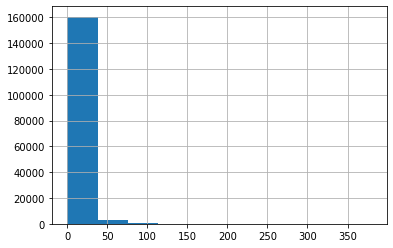

In [313]:
df.реакциямин.hist()

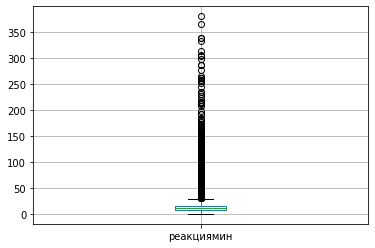

In [314]:
df.boxplot('реакциямин')

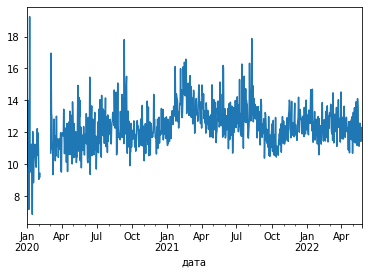

In [319]:
df.реакциямин.resample('D').mean().plot()

In [ ]:
from pandas.plotting import scatter_matrix

In [325]:
mindf = df[['реакциямин','деннед']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f675f6d1f50>,
      dtype=object)

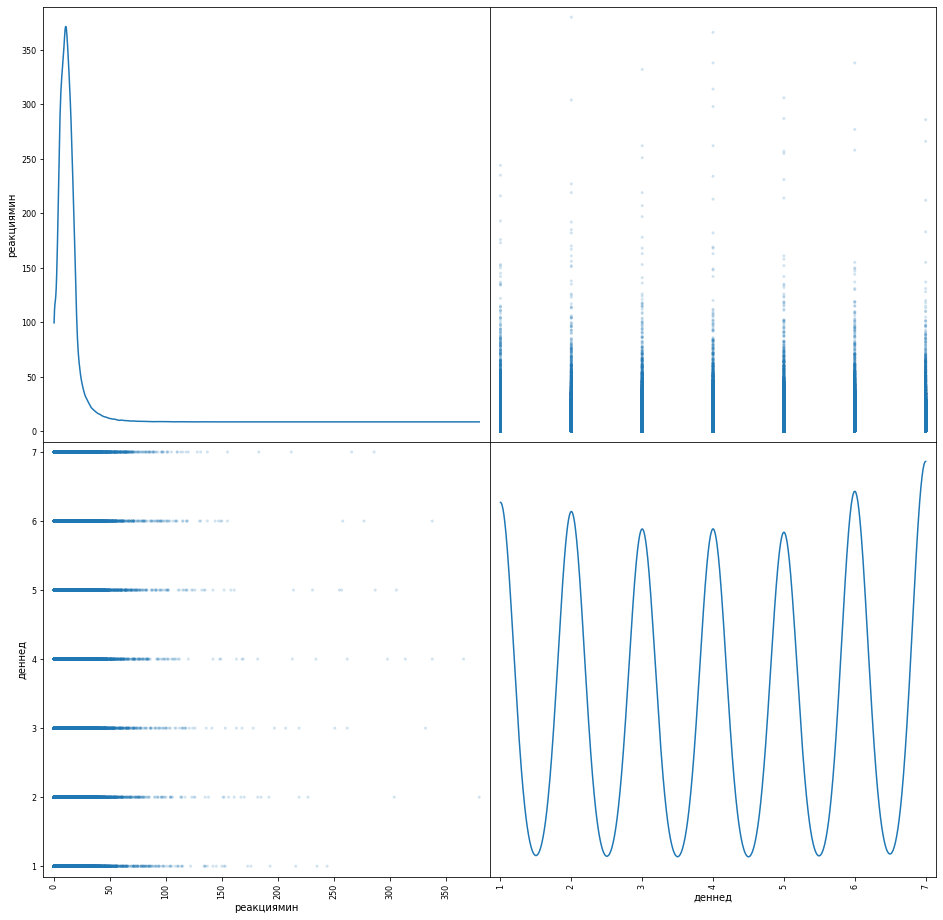

In [327]:
scatter_matrix(mindf, alpha=0.2, figsize=(16, 16), diagonal='kde')

In [328]:
df

,год,мес,ден,абонент,Номер,Возраст,Повод,Вызов,Вид,Диагноз,...,Адрес,Исполчас,Исполмин,реакциямин,деннед,дата,юниксдата,Госпит-анчас,Госпит-анмин,Диспетчер
дата,,,,,,,,,,,,,,,,,,,,,
2020-01-01 09:46:00,2020,1,1,"родственник, проживающий совместно с больным",8(8),26.0,"Температура, взрослый",Первичный,неотложное состояние,ОРВИ. Гипертермический синдром,...,NaN,0.0,0.0,6,3,2020-01-01 09:46:00,1.577872e+09,NaN,NaN,NaN
2020-01-01 10:56:00,2020,1,1,больной или пострадавший,16(16),68.0,Болит живот (взрослый),Первичный,неотложное состояние,Люмбалгия,...,"г.Нижний Новгород, ш. Казанское, д.9, кв***",0.0,0.0,2,3,2020-01-01 10:56:00,1.577876e+09,NaN,NaN,NaN
2020-01-01 12:07:00,2020,1,1,больной или пострадавший,21(21),1.0,NaN,Первичный,неотложное состояние,Острый бронхит,...,"г.Нижний Новгород, ул. Родионова, д.167, корп....",0.0,0.0,10,3,2020-01-01 12:07:00,1.577880e+09,NaN,NaN,NaN
2020-01-01 13:45:00,2020,1,1,"родственник, проживающий совместно с больным",28(28),8.0,Болит живот (ребенок),Первичный,внезапное заболевание,Другие болезни желчевыводящих путей,...,NaN,0.0,0.0,8,3,2020-01-01 13:45:00,1.577886e+09,NaN,NaN,NaN
2020-01-01 13:54:00,2020,1,1,больной или пострадавший,29(29),79.0,Болит живот (взрослый),Первичный,неотложное состояние,Гастрит,...,"г.Нижний Новгород, ул. Богдановича, д.1, кв.***",0.0,0.0,14,3,2020-01-01 13:54:00,1.577887e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-24 10:44:00,2022,5,24,"родственник, проживающий совместно с больным",10255(10),74.0,Повышение ад без признаков криза,Первичный,неотложное состояние,Артериальная гипертензия,...,NaN,0.0,0.0,4,2,2022-05-24 10:44:00,1.653389e+09,NaN,NaN,NaN
2022-05-24 10:47:00,2022,5,24,"родственник, проживающий совместно с больным",171922(142),29.0,Эпилепсия (припадок),Первичный,внезапное заболевание,Эпилепсия. Состояние после эпиприпадка,...,NaN,0.0,0.0,8,2,2022-05-24 10:47:00,1.653389e+09,NaN,NaN,NaN
2022-05-24 11:08:00,2022,5,24,"родственник, проживающий отдельно",6025(4),78.0,"Задыхается, приступ бронхиальной астмы",Первичный,внезапное заболевание,Бронхиальная астма,...,"с.Трофимово, ул. М.Горького, д.89",0.0,0.0,5,2,2022-05-24 11:08:00,1.653390e+09,NaN,NaN,NaN


In [329]:
df.to_csv('db.csv') 

In [330]:
!zip -9 dbcsv.zip db.csv

  adding: db.csv (deflated 90%)
